In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

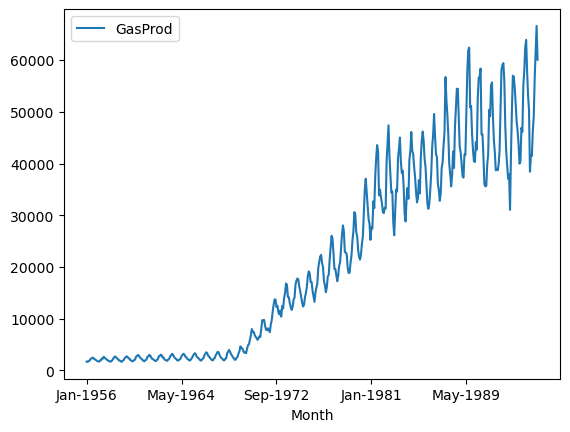

In [2]:
from pandas import read_csv


df = read_csv('AusGas.csv')
df.head()

df.plot.line(x = 'Month', y='GasProd')
plt.show()

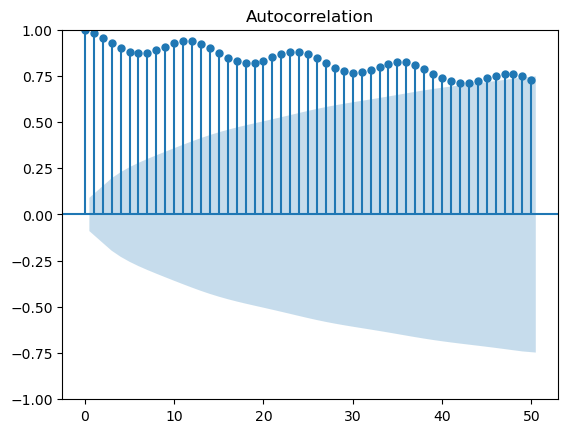

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['GasProd'],lags=50)
plt.show()

In [4]:
y = df['GasProd']
y_train = y[:464]
y_test = y[464:]

In [5]:
from statsmodels.tsa.ar_model import AutoReg
#train autoregression
model = AutoReg(y_train, lags=6)
model_fit = model.fit()
print('Coefficients: %s'% model_fit.params)


Coefficients: const         217.719010
GasProd.L1      1.169807
GasProd.L2      0.072351
GasProd.L3     -0.298099
GasProd.L4     -0.171587
GasProd.L5      0.001518
GasProd.L6      0.221831
dtype: float64


In [6]:
#make predictions
from numpy import sqrt
from sklearn.metrics import mean_squared_error


predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))

Test RMSE: 9275.386


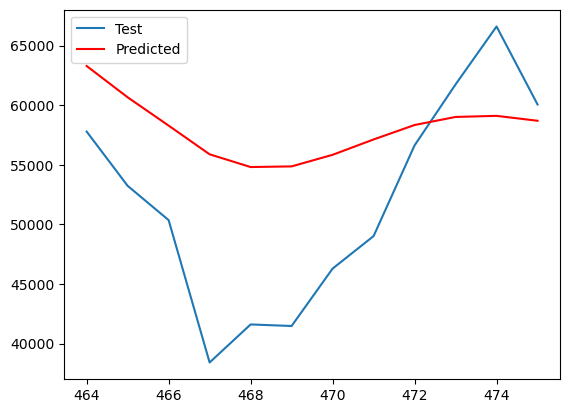

In [7]:
# plot results
plt.plot(y_test, label='Test')
plt.plot(predictions, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

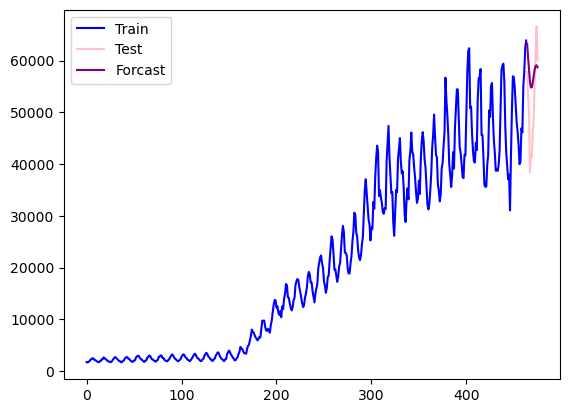

In [8]:

# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
predictions.plot(color="purple", label='Forcast')
plt.legend(loc='best')
plt.show()

In [9]:
rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

Test RMSE: 9275.386


MA

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coefficients: const     2.062941e+04
ma.L1     9.057513e-01
sigma2    9.901638e+07
dtype: float64
Test RMSE: 31148.811


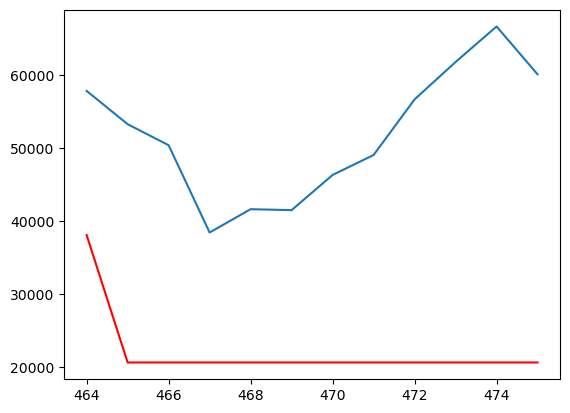

Test RMSE: 31148.811


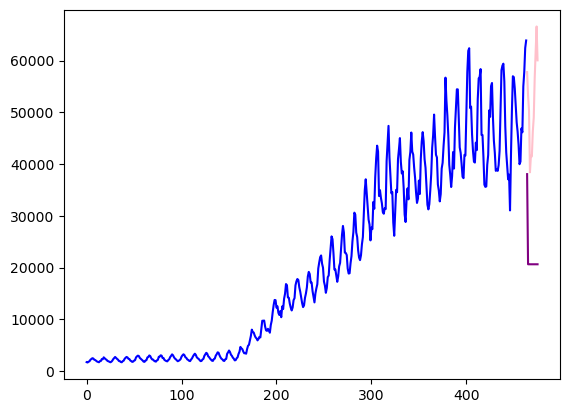

In [10]:
########################## MA ##############################
from statsmodels.tsa.arima.model import ARIMA
# train MA
model = ARIMA(y_train,order=(0,0,1))
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
    
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))
# plot results
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

# plot
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")

rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

ARMA

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coefficients: const     2.062608e+04
ar.L1     1.479220e+00
ar.L2    -4.213572e-01
ar.L3    -2.399050e-01
ar.L4     8.944631e-02
ar.L5     6.482736e-02
ar.L6    -3.938101e-01
ar.L7     4.212593e-01
ma.L1    -6.587838e-01
sigma2    4.298069e+06
dtype: float64
Test RMSE: 3276.644


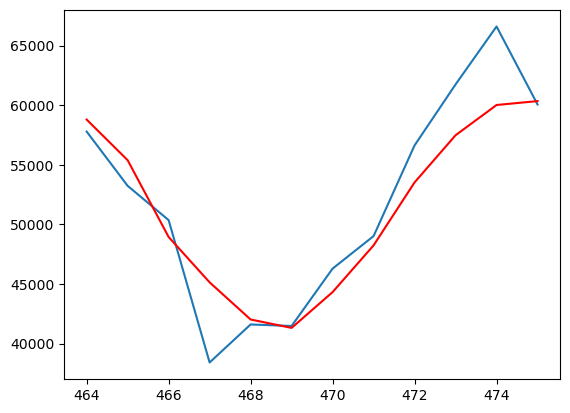

Test RMSE: 3276.644


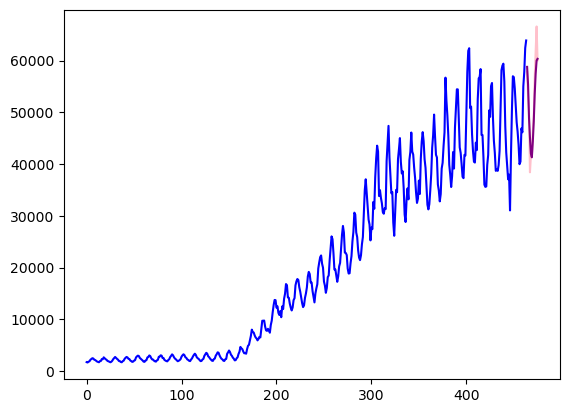

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# train ARMA
model = ARIMA(y_train,order=(7,0,1))
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)
    
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))
# plot results
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

# plot
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")

rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

Coefficients: ar.L1     2.849865e-01
ar.L2     2.125378e-01
ar.L3    -1.874192e-01
sigma2    6.236909e+06
dtype: float64
Test RMSE: 14837.579


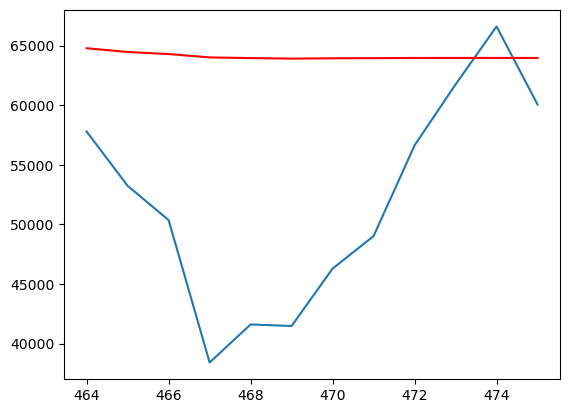

Test RMSE: 14837.579


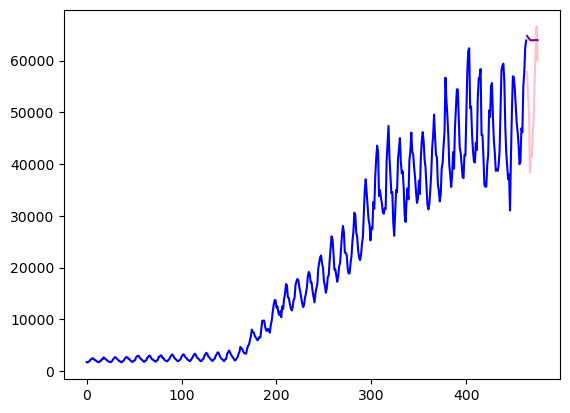

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# train ARIMA
model = ARIMA(y_train,order=(3,1,0))
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)
    
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))

# plot results
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

# plot
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")

rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.087, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8320.289, Time=1.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.161, Time=0.99 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8270.679, Time=1.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.257, Time=1.12 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8391.006, Time=1.82 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

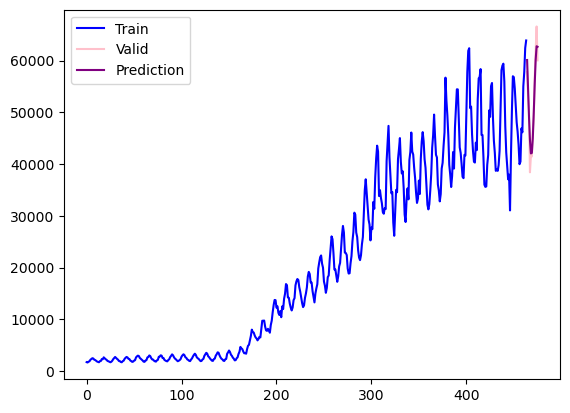

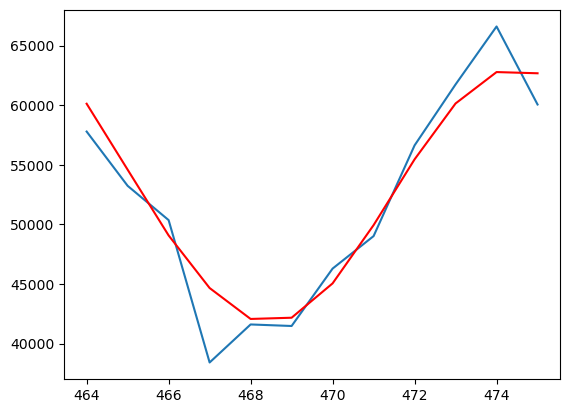

Test RMSE: 2524.188


In [13]:
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()


# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=0.94 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8170.934, Time=1.84 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.58 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.675, Time=3.18 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8228.450, Time=3.76 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.44 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.24 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=1.18 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

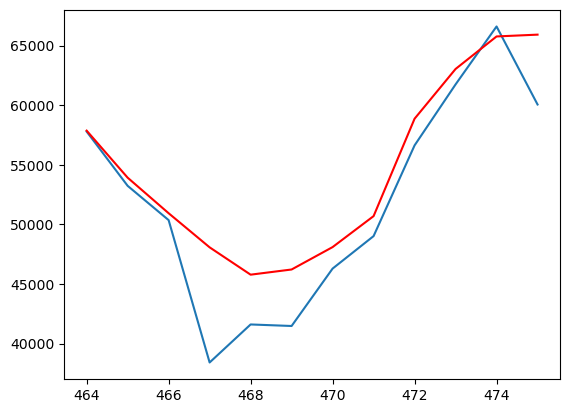

Test RMSE: 3892.879


In [14]:
### SARMIA
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,m=12)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])


# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)
